In [6]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
# Set up size and font size for figure
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams['animation.html'] = 'jshtml'

# Demonstrate the Gibbs phenomenon

<ipython-input-3-1a19027c6f07>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x,f,color='k',LineWidth=2)


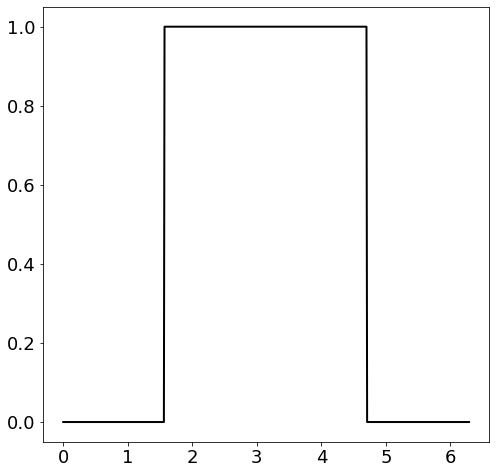

In [3]:
# Set up input: dx, L, x, nquart
dx = 0.01 # increment
L = 2*np.pi #range
x = np.arange(0,L+dx,dx) # x
n = len(x) # number of points
nquart = int(np.floor(n/4)) # jumping point

# Set up function f
f = np.zeros_like(x)
f[nquart:3*nquart] = 1
plt.plot(x,f,color='k',LineWidth=2)

<ipython-input-4-bd54162df4aa>:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x,f,color='k',LineWidth=2)
<ipython-input-4-bd54162df4aa>:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x,fFS,'-',color='r',LineWidth=1.5)


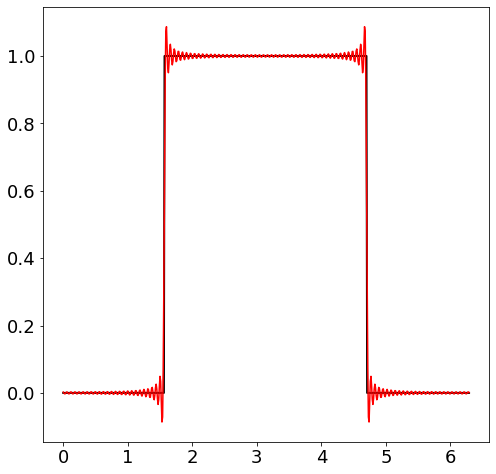

In [4]:
# Compute Fourier transformation

## Compute A0 and fFS(0)
A0 = np.sum(f * np.ones_like(x)) * dx * 2 / L
fFS = A0/2 * np.ones_like(f)

# Compute Ak, Bk, and fFS(k) for k >0
for k in range(1,101):
    Ak = np.sum(f * np.cos(2*np.pi*k*x/L)) * dx * 2 / L
    Bk = np.sum(f * np.sin(2*np.pi*k*x/L)) * dx * 2 / L
    fFS = fFS + Ak*np.cos(2*k*np.pi*x/L) + Bk*np.sin(2*k*np.pi*x/L)

# Visualization
plt.plot(x,f,color='k',LineWidth=2)
plt.plot(x,fFS,'-',color='r',LineWidth=1.5)
plt.show()

<ipython-input-7-a1f1a99a0a6c>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x,f,color='k',LineWidth=2)
<ipython-input-7-a1f1a99a0a6c>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  fFS_plot, = plt.plot([],[],color='r',LineWidth=2)


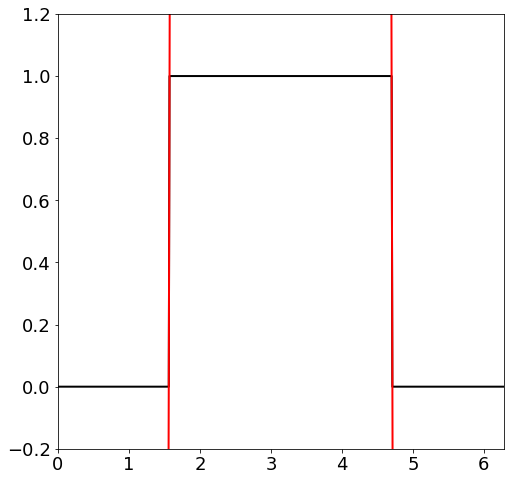

In [7]:
fig,ax = plt.subplots()
plt.plot(x,f,color='k',LineWidth=2)
fFS_plot, = plt.plot([],[],color='r',LineWidth=2)

all_fFS = np.zeros((len(fFS),101))
all_fFS[:,0] = fFS

for k in range(1,101):
    Ak = np.sum(f * np.cos(2*np.pi*k*x/L)) * dx * 2 / L
    Bk = np.sum(f * np.sin(2*np.pi*k*x/L)) * dx * 2 / L
    fFS = fFS + Ak*np.cos(2*k*np.pi*x/L) + Bk*np.sin(2*k*np.pi*x/L)
    all_fFS[:,k] = fFS

def init():
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(-0.2, 1.2)
    return fFS

def animate(iter):
    fFS_plot.set_data(x,all_fFS[:,iter])
    return fFS_plot

anim = animation.FuncAnimation(fig,animate,init_func=init,frames=101,interval=50,blit=False,repeat=False)
HTML(anim.to_jshtml())